In [32]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math

In [33]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import load_logs

pbounds = {"mid_i_mean": [97, 110], "ext_i_mean": [97, 110], "inj_i_mean": [116, 128]}
new_optimizer = BayesianOptimization(f=(lambda inj_i_mean, mid_i_mean, ext_i_mean:0),pbounds=pbounds)

# New optimizer is loaded with previously seen points
load_logs(new_optimizer, logs=["../Data/Simulations/logs.json"])

new_optimizer.space.target

array([ 73.61018772,  82.81792205, 117.85141151, 127.7585105 ,
       129.95153431, 122.48121462, 135.00442889, 139.2024724 ,
       139.10593536, 103.31252866, 140.13928589, 140.76415407,
       135.70712309, 140.68378421, 140.9345352 , 115.79949849,
       139.10056539, 140.75309626, 113.14151144, 140.91696649,
       140.90184677, 140.43048586, 141.1182964 , 140.91220277,
       131.95435419])

In [34]:
def extract_target_logs(fn, logdir = "../Data/Simulations/"):
    pbounds = {"mid_i_mean": [97, 110], "ext_i_mean": [97, 110], "inj_i_mean": [116, 128]}
    new_optimizer = BayesianOptimization(f=(lambda inj_i_mean, mid_i_mean, ext_i_mean:0),pbounds=pbounds)
    # New optimizer is loaded with previously seen points
    load_logs(new_optimizer, logs=[logdir+fn])

    return new_optimizer.space.target
extract_target_logs("logs.json")

array([ 73.61018772,  82.81792205, 117.85141151, 127.7585105 ,
       129.95153431, 122.48121462, 135.00442889, 139.2024724 ,
       139.10593536, 103.31252866, 140.13928589, 140.76415407,
       135.70712309, 140.68378421, 140.9345352 , 115.79949849,
       139.10056539, 140.75309626, 113.14151144, 140.91696649,
       140.90184677, 140.43048586, 141.1182964 , 140.91220277,
       131.95435419])

In [35]:
# import OS module
import os
 
# Get the list of all files and directories
path = "../Data/Simulations/"
dir_list = os.listdir(path)
dir_list

['logs_eipu_17-02-2023_02-22-15_time_12222.815460273003.json',
 'logs_ei_17-02-2023_02-18-25_time_16119.200340301415.json',
 'logs_ei_17-02-2023_02-11-20_time_13192.685365845624.json',
 'logs_eipu_17-02-2023_02-19-14_time_11676.749809800864.json',
 'logs_ei_17-02-2023_02-18-12_time_14901.316602128938.json',
 'logs_ei_17-02-2023_02-11-28_time_13823.132450496527.json',
 'logs_ei_17-02-2023_02-14-18_time_13568.527438023377.json',
 'logs_ei_17-02-2023_02-19-07_time_13414.768348859481.json',
 'logs_ei_17-02-2023_02-18-33_time_15306.942831984203.json',
 'logs_eipu_17-02-2023_02-13-10_time_11961.407018432152.json',
 'logs_ei_17-02-2023_02-18-51_time_13305.72480996054.json',
 'logs_eipu_17-02-2023_02-20-15_time_11759.349874909856.json',
 'logs_eipu_17-02-2023_02-18-40_time_11367.770312910196.json',
 'logs_eipu_17-02-2023_02-21-29_time_11802.456415070568.json',
 'logs_ei_17-02-2023_02-18-20_time_13540.80485204808.json',
 'logs_eipu_17-02-2023_02-19-51_time_11796.409762057892.json',
 'logs_eipu_

In [36]:
def get_best(arr):
    # return an equal length array that records the best value seen so far
    best = np.array([arr[:i+1].max() for i in range(len(arr))])
    return best

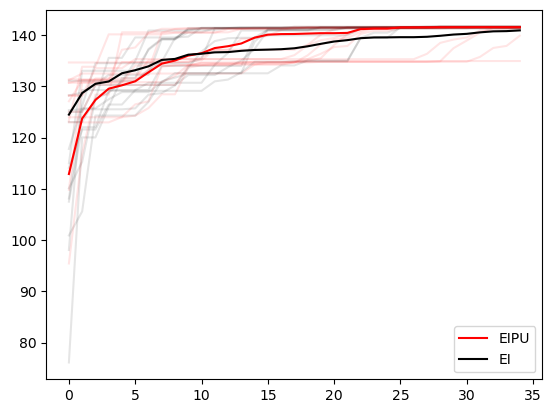

In [40]:
ei_logs = []

eipu_logs = []

for log in dir_list:
    if 'eipu' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 35-len(target_log)))
        target_log = get_best(target_log)
        ei_logs.append(target_log)
        plt.plot(target_log, c='r', alpha=0.1)
    elif 'ei' in log:
        target_log = extract_target_logs(log)
        target_log = np.pad(target_log, (0, 35-len(target_log)))
        target_log = get_best(target_log)
        eipu_logs.append(target_log)
        plt.plot(target_log, c='black', alpha=0.1)
plt.plot(sum(eipu_logs)/len(eipu_logs), c='r', label='EIPU')
plt.plot(sum(ei_logs)/len(ei_logs), c='black', label='EI')  
plt.legend()  
plt.show()

# plt.plot(extract_target_logs("logs_ei_17-02-2023_01-33-14.json"))
# plt.plot(extract_target_logs("logs_eipu_17-02-2023_01-32-21.json"))


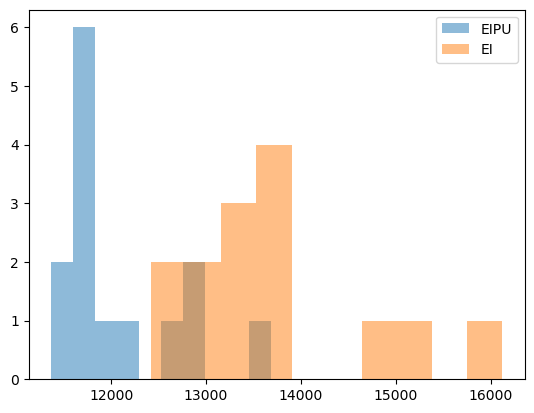

In [41]:
eipu_time = []
ei_time = []
for log in dir_list:
    if 'eipu' in log:
        if 'time' in log:
            eipu_time.append(float(log.split('_')[-1][:-5]))
    elif 'ei' in log:
        if 'time' in log:
            ei_time.append(float(log.split('_')[-1][:-5]))
plt.hist(eipu_time, alpha=0.5, label='EIPU')
plt.hist(ei_time, alpha=0.5, label='EI')
plt.legend()
plt.show()